


<font size='10' color = 'E3A440'>**Mégadonnées et techniques avancées démystifiées**</font>
=======
<font color = 'E3A440'>*Nouvelles méthodes d’analyse et leur implication quant à la gestion des mégadonnées en SSH (partie 2)*</font>
=============


Cet atelier s’inscrit dans le cadre de la formation [Mégadonnées et techniques avancées démystifiées](https://www.4point0.ca/2022/08/22/formation-megadonnees-demystifiees/) (séance 7).

Les sciences humaines et sociales sont souvent confrontées à l’analyse de données non structurées, comme le texte. Après avoir préparé les données, plusieurs techniques d’analyse venant de l’apprentissage automatique peuvent être utilisées. Pendant cet atelier, les participants seront initiés au prétraitement des données textuelles et aux méthodes supervisées et non supervisées à des buts d’analyse avec Python.

Structure de l'atelier :

1. Partie 1 : Exemples de méthodes non supervisées et supervisées appliquées à l'analyse de textes.
2. Partie 2 : Exercices sur les méthodes non supervisées et supervisées

### Auteurs: 
- Bruno Agard <bruno.agard@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>

Département de Mathématiques et de génie industriel

École Polytechnique de Montréal

# <font color = 'E3A440'>0. Préparation de l'environnement </font>

In [1]:
# Downloading of data from the GitHub project
#!rm -rf Data_techniques_demystified_webinars/
!rm -rf Donnees_demystifiees_seance_6/
#!git clone https://github.com/4point0-ChairInnovation-Polymtl/Data_techniques_demystified_webinars
!git clone https://github.com/puli83/Donnees_demystifiees_seance_6

xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


In [2]:
# Import modules
import os
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /Users/bragard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bragard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/bragard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/bragard/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bragard/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/bragard/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

# <font color = 'E3A440'>1. Prétraitement du corpus (rappels)</font>

Le prétraitement d'un corpus de textes peut nécessiter la mise en place de plusieurs étapes dont : le découpage des phrases, des mots, le nettoyage, le filtrage, etc.

Dans les prochains blocs de code, un texte sera segmenté en phrases et prétraité au moyen de la fonction `CleaningText()` préparée lors de la séance précédente.


In [3]:
text = """At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, Arthur is feeling better.
A dog runs in the street.
A little boy in running in the street.
Arthur is my dog, he sleeps every morning."""

In [4]:
# extraction des phrases
sentences = nltk.sent_tokenize(text)
print(sentences)

["At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.", 'This morning, Arthur is feeling better.', 'A dog runs in the street.', 'A little boy in running in the street.', 'Arthur is my dog, he sleeps every morning.']


In [5]:
# Cleaning fonction to preprocess text
def CleaningText(text_as_string, language = 'english', reduce = '', list_pos_to_keep = [], Stopwords_to_add = []):
    from nltk.corpus import stopwords

    words = nltk.word_tokenize(text_as_string)
    words_pos = nltk.pos_tag(words, tagset='universal')
    words_pos = [(w, pos) for w, pos in words_pos if w.isalnum()]
    words_pos = [(w.lower(), pos) for w, pos in words_pos]
    
    if reduce == 'stem': 
        from nltk.stem.porter import PorterStemmer
        reduced_words_pos = [(PorterStemmer().stem(w), pos) for w, pos in words_pos]
        
    elif reduce == 'lemma':
        from nltk.stem.wordnet import WordNetLemmatizer
        reduced_words_pos = [(WordNetLemmatizer().lemmatize(w), pos) for w, pos in words_pos]
    else:
        import warnings
        reduced_words_pos = words_pos
        warnings.warn("Warning : any reduction was made on words! Please, use \"reduce\" argument to chosse between 'stem' or  'lemma'")
    if list_pos_to_keep:
        reduced_words_pos = [(w, pos) for w, pos in reduced_words_pos if pos in list_pos_to_keep]
    else:
        import warnings
        warnings.warn("Warning : any POS filtering was made. Please, use \"list_pos_to_keep\" to create a list of POS tag to keep.")
    
    list_stopwords = stopwords.words(language) + Stopwords_to_add
    reduced_words_pos = [(w, pos) for w, pos in reduced_words_pos if w not in list_stopwords and len(w) > 1 ]
    return reduced_words_pos   

In [6]:
# nettoyage des phrases, sélection de pos-tag
cleaned_sentences = [CleaningText(sent, reduce = 'stem', list_pos_to_keep = ['NOUN','ADJ','VERB']) for sent in sentences]
print(cleaned_sentences)

[[('thursday', 'NOUN'), ('morn', 'NOUN'), ('great', 'ADJ'), ('arthur', 'NOUN'), ('feel', 'VERB'), ('good', 'ADJ')], [('morn', 'NOUN'), ('arthur', 'NOUN'), ('feel', 'VERB')], [('dog', 'NOUN'), ('run', 'VERB'), ('street', 'NOUN')], [('littl', 'ADJ'), ('boy', 'NOUN'), ('run', 'VERB'), ('street', 'NOUN')], [('arthur', 'NOUN'), ('dog', 'NOUN'), ('sleep', 'VERB'), ('morn', 'NOUN')]]


# <font color = 'E3A440'>2. Vectorisation (rappels)</font>

Le contenu des textes peut être représenté sous forme matricielle.

$$X = \begin{bmatrix} 
x_{1,1} & x_{1,2} & \ldots & x_{1,w} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n,1} & x_{1,2} & \ldots & x_{n,w} \\
\end{bmatrix}
$$ 

Avec :

- $x_{i,j}$ peut représenter la présence du mot "j" dans le texte $i$,
- $x_{i,j}$ peut mesurer le nombre d'occurences du mot $j$ dans le texte $i$,
- $x_{i,j}$ peut représenter l'**importance** du mot $j$ dans le texte $i$, dans ce cas on utilisera par exemple la métrique tf-idf :
 $$\text{tf-idf}_{i,j}=\text{tf}_{i,j}.log\left(\frac{n}{n_i}\right)$$
 - $\text{tf}_{i,j}$ est la fréquence du terme $i$ dans le document $j$,
 - $n$ nombre total de documents dans l’ensemble de textes à étudier,
 - $n_i$ nombre de documents dans l’ensemble de textes qui contiennent le terme $i$.


In [7]:
# Initialisation de l'objet
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 1, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 10, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords.words('english'), # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

Utilisation du "vectorizer" avec une liste de listes de mots (et non une liste de tuples de mots-pos) et création de la matrice avec pondération de fréquence.

In [8]:
# Application du vectorizer
freq_term_DTM = vectorized.fit_transform([[w for w, pos in sent] for sent in cleaned_sentences])

freq_Matrix=pd.DataFrame(freq_term_DTM.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(freq_Matrix)

   arthur  boy  dog  feel  good  great  littl  morn  run  sleep  street  \
0       1    0    0     1     1      1      0     1    0      0       0   
1       1    0    0     1     0      0      0     1    0      0       0   
2       0    0    1     0     0      0      0     0    1      0       1   
3       0    1    0     0     0      0      1     0    1      0       1   
4       1    0    1     0     0      0      0     1    0      1       0   

   thursday  
0         1  
1         0  
2         0  
3         0  
4         0  


/Users/bragard/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Crération de la matrice avec pondéraiton tf-idf.

In [9]:
# Calculate the tfidf matrix
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

tfidf_Matrix=pd.DataFrame(tfidf_DTM.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(tfidf_Matrix)

     arthur       boy       dog      feel      good     great     littl  \
0  0.130137  0.000000  0.000000  0.156774  0.194317  0.194317  0.000000   
1  0.312043  0.000000  0.000000  0.375914  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.333333  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.276733  0.000000  0.000000  0.000000  0.000000  0.276733   
4  0.212863  0.000000  0.256433  0.000000  0.000000  0.000000  0.000000   

       morn       run     sleep    street  thursday  
0  0.130137  0.000000  0.000000  0.000000  0.194317  
1  0.312043  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.333333  0.000000  0.333333  0.000000  
3  0.000000  0.223267  0.000000  0.223267  0.000000  
4  0.212863  0.000000  0.317842  0.000000  0.000000  


# <font color = 'E3A440'>3. Méthodes non supervisées</font>


## <font color = 'E3A440'>3.0. Segmentation </font>


Le but de la segmentation est de diviser un ensemble de données en sous ensembles plus petits qui partagent certaines caractéristiques.

On veut que les éléments au sein d'un même sous groupe soit le plus similaires possibles.

Une grande majorité des méthodes de segmentation est alors basée sur des métriques de distance.



### <font color = 'E3A440'>3.1. Métriques de distance </font>




#### <font color = 'E3A440'>3.1.1. Distances entre points </font>

Il existe de nombreuses métriques pour évaluer la similarité/distance entre deux points :


### Distance Euclidienne

$$d(x_1,x_2) = \sqrt{\sum_i^n\left(x_{1,i},x_{2,i}\right)^2}$$


### Distances de Hamming

En nombre de coordonnées différentes

$$d_1(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    0,\ if\ x_{1,i} = x_{2,i}\\
    Sinon\ 1\\
    \end{cases}
\end{split}


En nombre de coordonnées différentes "positives"

$$d_2(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    0,\ if\ x_{1,i} = x_{2,i} = 1\\
    Sinon\ 1\\
    \end{cases}
\end{split}

En pourcentage de coordonnées différentes / "positives"

$$d_3(x_1,x_2) = \frac{d_1(x_1,x_2)\ ou\ d_2(x_1,x_2)}{n}$$

Avec différentes pondérations possibles

$$d_4(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    p,\ if\ x_{1,i} = x_{2,i} = 1\\
    1,\ if\ x_{1,i} = x_{2,i} = 0\\ 
    Sinon\ 0\\
    \end{cases}
\end{split}


Il existe d'autres versions 'adaptées" de Hamming...




### Plein d'autres ...

Mais aucune ne fait vraiment ce que vous aurez besoin, car votre besoin est unique.





#### <font color = 'E3A440'>3.1.2. Hypermétriques, distances entre groupes </font>


 - Plus proche voisin (single linkage)
 - Voisin le plus éloigné (complete linkage)
 - Distance moyenne (average linkage)
 - Distance au centre de gravité
 - ...





### <font color = 'E3A440'>3.2. Normalisation des données </font>

Pour les algorithmes basés sur la distance, il est important de normaliser les données :

In [10]:
from scipy.spatial import distance

X = np.array([[100000, 0, 0, 0, 0, 0, 0],
              [100000, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1],
             ])

print(X)

[[100000      0      0      0      0      0      0]
 [100000      1      1      1      1      1      1]
 [     1      1      1      1      1      1      1]]


In [11]:
print( distance.euclidean(X[0], X[1]) )
print( distance.euclidean(X[1], X[2]) )

2.449489742783178
99999.0


#### Normalisation décimale

In [12]:
XD=X.copy()
XD[:, 0] = XD[:, 0]/100000

print(XD)

[[1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1]]


In [13]:
print( distance.euclidean(XD[0], XD[1]) )
print( distance.euclidean(XD[1], XD[2]) )

2.449489742783178
1.0


#### Normalisation Min/max

In [14]:
from sklearn.preprocessing import MinMaxScaler

XmM=X.copy()
scaler = MinMaxScaler().fit(XmM)
XmM=scaler.transform(XmM)
#X=scaler.inverse_transform(X)

print(XmM)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1.]]


In [15]:
print( distance.euclidean(XmM[0], XmM[1]) )
print( distance.euclidean(XmM[1], XmM[2]) )

2.449489742783178
1.0


#### Normalisation sur la variance

In [16]:
from sklearn.preprocessing import StandardScaler

XV=X.copy()
scaler = StandardScaler().fit(XV)
XV=scaler.transform(XV)
#X=scaler.inverse_transform(X)

print(XV)

[[ 0.70710678 -1.41421356 -1.41421356 -1.41421356 -1.41421356 -1.41421356
  -1.41421356]
 [ 0.70710678  0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
   0.70710678]
 [-1.41421356  0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
   0.70710678]]


In [17]:
print( distance.euclidean(XV[0], XV[1]) )
print( distance.euclidean(XV[1], XV[2]) )

5.196152422706631
2.1213203435596424


### <font color = 'E3A440'>3.3. Algorithmes de segmentation </font>

Il existe de nombreux algorithmes pour réaliser la segmentation d'un ensemble de données. On choisi un algorithme particulier en fonction du type de données et du type de résultat que l'on cherche.

In [18]:
# Draw fonction to plot results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import unique
from numpy import where

def draw(X,yhat):
    # retrieve unique clusters
    clusters = unique(yhat)

    #plt.figure(figsize=(10, 10))
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])

    plt.title("Clusters")
    # show the plot
    plt.show() 

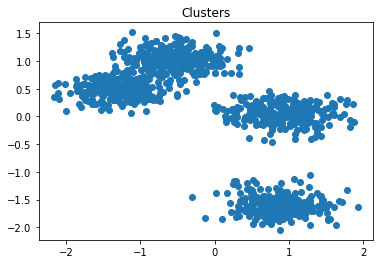

In [19]:
#dataset generator
k=4
n_samples=1000
features=3

# define dataset
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples, centers=k, n_features=features, cluster_std=0.6, random_state=0)

scaler = StandardScaler().fit(X)
X=scaler.transform(X)
#X=scaler.inverse_transform(X)

yhat=np.zeros(n_samples)
    
draw(X,yhat)

#### <font color = 'E3A440'>3.3.1. k-means</font>
L'application d'un algorithme de <font color='E3A440'>**segmentation**</font> à une base de données permet de segmenter les observations dans des groupes de données homogènes.

Pour ce faire, l'objectif de l'algorithme k-means est de minimiser l'inertie intra-classe autour d'un représentant de chaque groupe. Pour k-means, le représentant que chaque groupe est la moyenne de ce groupe. Les représentants sont remis à jour à chaque itération lors de l'apprentissage.

La méthode k-means génère un vecteur  $Y$ de taille $n$, qui contient les <font color='E3A440'>**étiquettes des groupes**</font> assignées à chaque observation. Les étiquettes peuvent aller de $0$ à $k$. $k$ est le paramètre qui permet à l'usager de déterminer le nombre de groupes à générer. 

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

$Y_i$ correspond au groupe attribué à $X_i$.

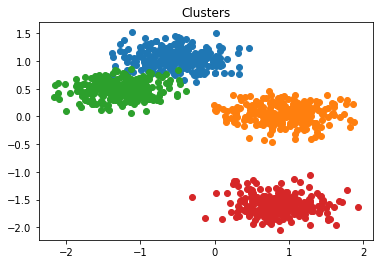

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(X)

# assign a cluster to each example
yhatkm = model.predict(X)

draw(X,yhatkm)

##### Que ce passe-t-il à chaque itération ?

L'algorithme exécute les étapes suivantes: 
 1. **Initialisation des représentants** : k points (*k* est choisi par l'usager) sont sélectionnés aléatoirement parmis l'ensemble de données. Chacun de ces points sera utilisé comme représentant d'un groupe pour la première itération. Chaque représentant portera l'étiquette du groupe qu'il représente.
 
 2. **Début des itérations**:

   2.1. **Classification**: Assigner à chaque point de l'ensemble de données l'étiquette du représentant qui lui est le plus proche.

   2.2. **Mise à jour des représentants**: Pour chaque groupe généré, calculer le "centre" des données associées au groupe. Ce centre sera le nouveau représentant pour le groupe.

   2.3. **Répétition**: Répéter les opérations 2.1. et 2.2. jusqu'à un critère d'arrêt (stabilisation des représentants, nombre d'itérations, temps de calcul...).


Iteration : 1


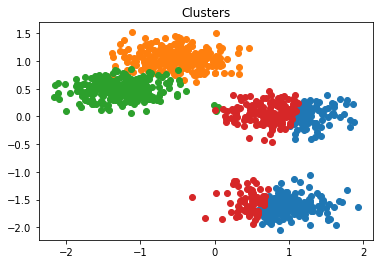

Iteration : 2


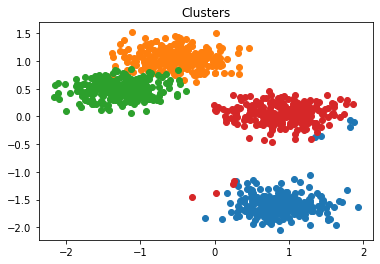

Iteration : 3


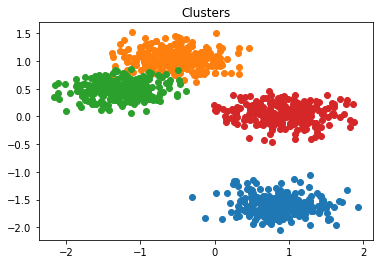

...
...
...

Iteration : 10


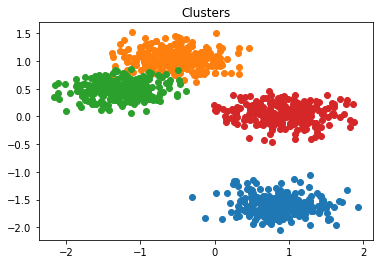

In [21]:
k=4

for i in range (1,4) :
    print("Iteration :", i)
    model = KMeans(n_clusters=k, max_iter=i, n_init=1, init="random", random_state=1).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

print("...\n...\n...\n")

i=10
print("Iteration :", i)
model = KMeans(n_clusters=k, max_iter=i, n_init=1, init="random", random_state=1).fit(X)
# assign a cluster to each example
yhatkm = model.predict(X)
draw(X,yhatkm)

##### Sensibilité à l'initialisation


Random state : 1


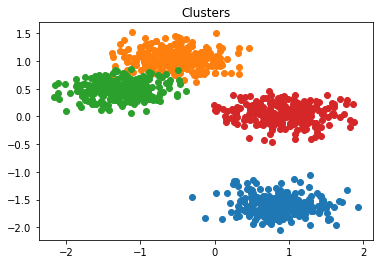

Random state : 2


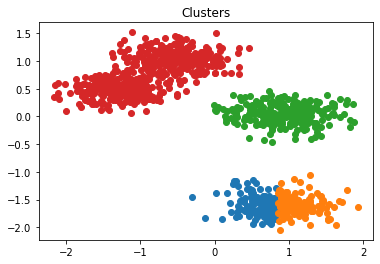

Random state : 3


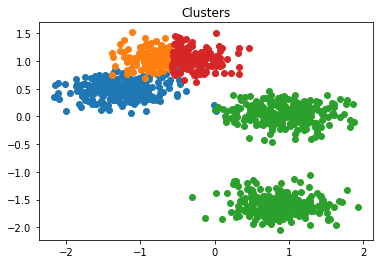

Random state : 4


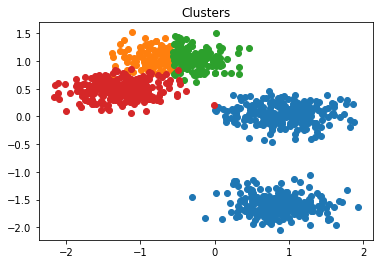

Random state : 5


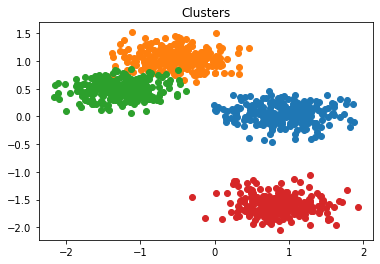

In [22]:
for rs in range (1,6) :
    print("Random state :", rs)
    model = KMeans(n_clusters=k, n_init=1, init="random", random_state=rs).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

Conclusions :

 - K-means est sensible aux choix initial des représentants, cet algorithme donne un optimum LOCAL.
 
 - L'initialisation a un impact sur les résultats du k-means, donc sur la qualité du partitionnement.

 - Pour compenser, on peut :
 
     - choisir judiscieusement les points d'initialisation en fonction de notre connaissance du problème,

     - appliquer k-means avec différents points de départ et garder le meilleur résultat,
         
     - appliquer des méthodes spécifiques d'initalisation, parmis lesquelles il y a *k-means++*.

##### Sensibilité au nombre de groupes

Le paramètre *k* détermine le nombre de groupes souhaités. La méthode est très sensible à ce paramètre, et il doit être choisi judiscieusement.

k =  1


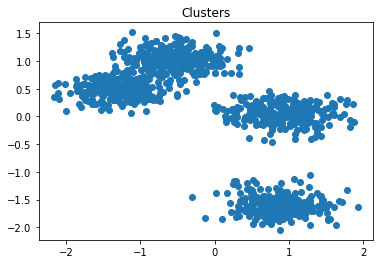

k =  2


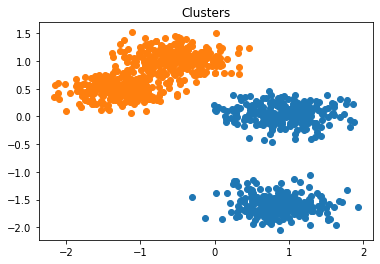

k =  3


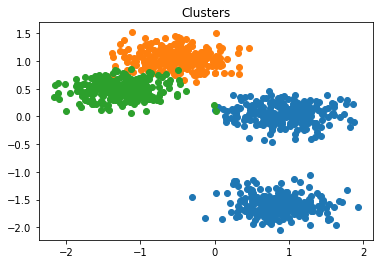

k =  4


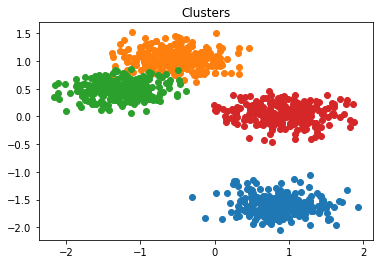

k =  5


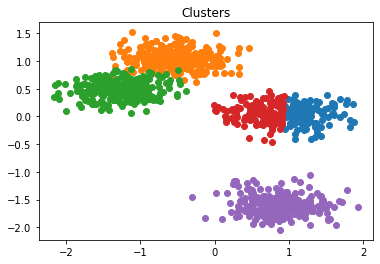

In [23]:
for m in range (1,6) :
    print("k = ", m)
    model = KMeans(n_clusters=m, max_iter=20, n_init=1, init="random", random_state=1).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

Conclusion :

  - un mauvais nombre de groupes peut donner des groupes qui ne font pas de sens dans le but de l'analyse.

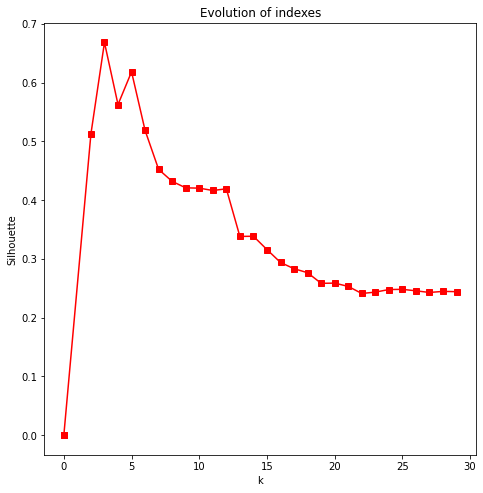

In [24]:
from sklearn.metrics import silhouette_score

max=30
Sil=np.zeros(max)
x_axis=np.zeros(max)

for m in range (2,max) :

    model = KMeans(n_clusters=m, max_iter=100, n_init=1, init="random", random_state=3).fit(X)

    # assign a cluster to each example
    labels = model.predict(X)

    Sil[m]=silhouette_score(X, labels, metric="euclidean")
    x_axis[m]=m

fig = plt.figure(figsize=(6, 6))
a1 = fig.add_axes([0,0,1,1])
l1 = a1.plot(x_axis,Sil,'rs-') # solid line with yellow colour and square marker
a1.set_xlabel('k')
a1.set_ylabel('Silhouette')
a1.set_title('Evolution of indexes')
plt.show()

##### À partir de notre ensemble de textes

In [25]:
print(text)

At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, Arthur is feeling better.
A dog runs in the street.
A little boy in running in the street.
Arthur is my dog, he sleeps every morning.


In [26]:
tfidf_Matrix=tfidf_DTM.toarray()

model = KMeans(n_clusters=2).fit(tfidf_Matrix)

# assign a cluster to each example
yhatkm_tfidf = model.predict(tfidf_Matrix)

print(yhatkm_tfidf)

[0 0 1 1 0]


#### <font color = 'E3A440'>3.3.2. Méthode hiéarchique CHA</font>

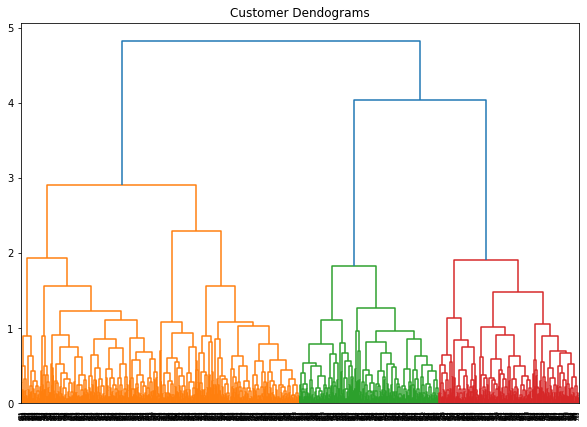

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, metric='euclidean', method='complete'))
plt.show()

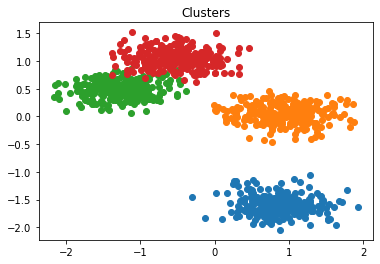

In [28]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit(X)
#{“ward”, “complete”, “average”, “single”},

# assign a cluster to each example
yhatac=model.fit_predict(X)

draw(X,yhatac)

##### À partir de notre ensemble de textes

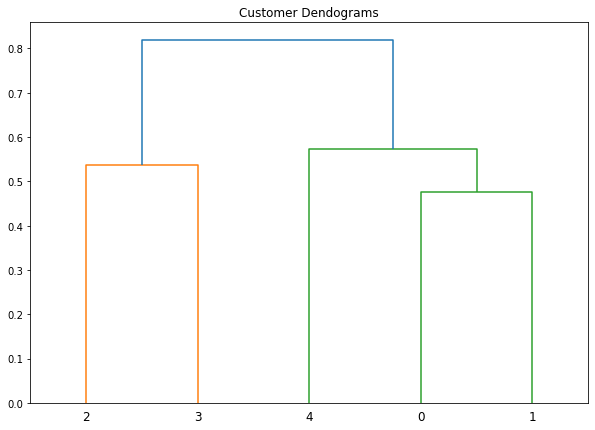

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(tfidf_Matrix, metric='euclidean', method='complete'))
plt.show()

#### <font color = 'E3A440'>3.3.3. DBSCAN</font>

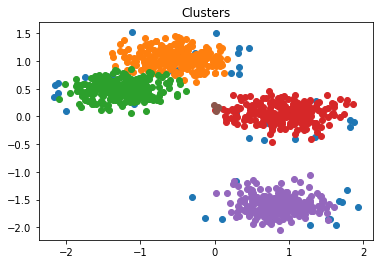

In [30]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.2, min_samples=4, metric="euclidean").fit(X)

# assign a cluster to each example
yhatdbs=model.fit_predict(X)

draw(X,yhatdbs)

#### <font color = 'E3A440'>3.3.4. Analyse du contenu des groupes</font>

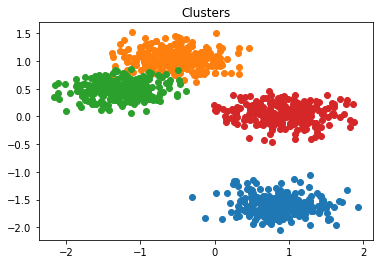

Silhouette= 0.721826710101402


In [31]:
model = KMeans(n_clusters=4, max_iter=20, n_init=1, init="random", random_state=1).fit(X)

# assign a cluster to each example
labels = model.predict(X)

draw(X,labels)

print("Silhouette=", silhouette_score(X, labels, metric="euclidean"))

In [32]:
clusters = unique(yhatkm)

for cluster in clusters:
    C = X[yhatkm[:] == cluster]
    labels=yhatkm[yhatkm[:] == cluster]
    print('Cluster %1.0f : size = %.0f' % (cluster, len(C)))

Cluster 0 : size = 120
Cluster 1 : size = 250
Cluster 2 : size = 250
Cluster 3 : size = 130
Cluster 4 : size = 250


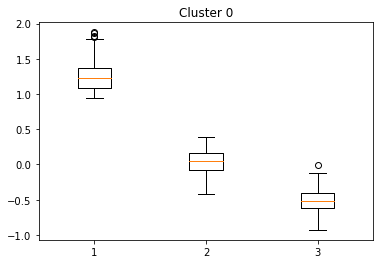

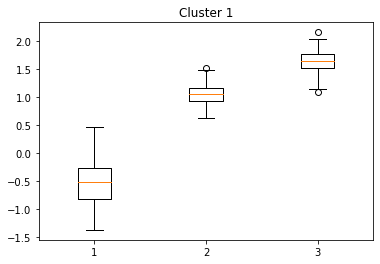

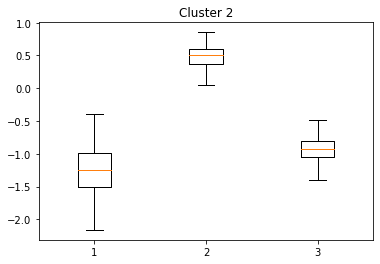

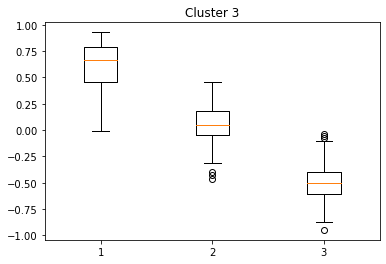

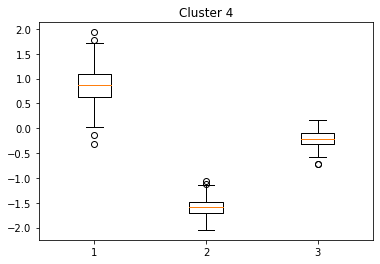

In [33]:
for cluster in clusters:
    C = X[yhatkm[:] == cluster]
    fig1, ax1 = plt.subplots()
    ax1.set_title('Cluster %1.0f' % (cluster))
    ax1.boxplot(C);

# <font color = 'E3A440'>4. Méthodes supervisées</font>


## <font color = 'E3A440'>4.1. Perceptron multicouches</font>

In [34]:
text2="""At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, at nine o'clock, Arthur is feeling better.
A dog runs in the street.
In my city, cats run in the street.
A little boy is running in the street.
Arthur is my dog, we love to walk in the street together."""

In [35]:
# Clean
sentences2 = nltk.sent_tokenize(text2)
cleaned_sentences2 = [CleaningText(sent, reduce = 'stem', list_pos_to_keep = ['NOUN','ADJ','VERB']) for sent in sentences2]

# Calculate the tfidf matrix
freq_term_DTM2 = vectorized.fit_transform([[w for w, pos in sent] for sent in cleaned_sentences2])
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM2 = tfidf.fit_transform(freq_term_DTM2)

# convert in Dataframe for pedagogical reason
tfidf_Matrix2 = pd.DataFrame(tfidf_DTM2.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
tfidf_Array2 = tfidf_DTM2.toarray()
print(tfidf_Matrix2)


     arthur       boy       cat      citi       dog      feel      good  \
0  0.129833  0.000000  0.000000  0.000000  0.000000  0.153781  0.187535   
1  0.296832  0.000000  0.000000  0.000000  0.000000  0.351584  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.389447  0.000000  0.000000   
3  0.000000  0.000000  0.304361  0.304361  0.000000  0.000000  0.000000   
4  0.000000  0.304361  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.168627  0.000000  0.000000  0.000000  0.199731  0.000000  0.000000   

      great     littl      love      morn       run    street  thursday  \
0  0.187535  0.000000  0.000000  0.153781  0.000000  0.000000  0.187535   
1  0.000000  0.000000  0.000000  0.351584  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.328798  0.281755  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.210713  0.180565  0.000000   
4  0.000000  0.304361  0.000000  0.000000  0.210713  0.180565  0.000000   
5  0.000000  0.000000  0

In [36]:
from sklearn.neural_network import MLPClassifier

#split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

X_train, X_test = tfidf_Array2[:5,:], tfidf_Array2[5:,:]
y_train, y_test = [1,1,2,2,2],[2]

In [37]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=5, learning_rate="constant", learning_rate_init=0.01)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=300,
              random_state=1)

In [38]:
y_valid=clf.predict(X_train)

In [39]:
y_pred=clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

y_valid=clf.predict(X_train)
y_pred=clf.predict(X_test)

print("Learning errors")
print("    Accurary = ", accuracy_score(y_train, y_valid)*100)

print("\nPrediction errors")
print("    Accurary = ", accuracy_score(y_test, y_pred)*100)

Learning errors
    Accurary =  100.0

Prediction errors
    Accurary =  100.0


In [41]:
from sklearn.metrics import confusion_matrix

print("\n** Learning performances: **") 
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 


** Learning performances: **
Confusion Matrix: 
[[2 0]
 [0 3]]
Accuracy :  100.0
** Prediction performances: **
Confusion Matrix: 
[[1]]
Accuracy :  100.0


# <font color = 'E3A440'>5. Exercice : Analyse de commentaires de blogs</font>


La base de données `20 Newsgroups` est une collection d'environ 20,000 documents segmentés en plus ou moins 20 thèmatiques différentes.

Les données sont téléchargées à partir du module `sklearn.datasets` et sont reorganisées en format tabulaire. Pour des raisons pédagogiques, cet exercice prévoit l'utilisation d'un échantillon d'environt 3,000 documents segmentés en 3 groupes différents : 
 1. `rec.autos`
 2. `rec.sport.hockey`
 3. `sci.med`

Pendant l'exercice, le participant sera invité à remplir les parties manquantes du code qui sont indiquées avec `...` (trois points).

In [42]:
from sklearn.datasets import fetch_20newsgroups

In [43]:
archive20newsgroup = fetch_20newsgroups(subset = 'all')
df = pd.DataFrame({'Text': archive20newsgroup.data, 'target': archive20newsgroup.target})
target_names = archive20newsgroup.target_names
print(target_names)
# subset selection
target_selected = [7,10,13]
df = df[df.target.isin(target_selected)]
target_names = [x for idx, x in enumerate(target_names) if idx in target_selected]
print(target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
['rec.autos', 'rec.sport.hockey', 'sci.med']


La base de données est composée de 2,979 documents, segmentés en 3 thématiques.

In [44]:
df.shape

(2979, 2)

Voici les noms de variables disponibles.

In [45]:
df.columns

Index(['Text', 'target'], dtype='object')

Voici une observation (une ligne du tableau de données):

In [46]:
df.iloc[0].Text

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

## <font color = 'E3A440'>5.1 Présentation de l'exercice </font>

L'exercise est composé de deux parties:

 1. Remplir les partie de code manquant (qui sont indiqués avec les `...`)
 2. Changer les paramètres du prétraitement pour expérimenter les impacts qu'ils peuvent avoir sur les méthodes non supervisées et supervisées. En particulier, vous êtes invités à expérimenter les opérations suivantes :

    2.1. Choisir une sélection de POS tag différents (fonction `CleaningText()`)

    2.2. Changer la seuil de fréquence minimale pour retenir un mot dans la matrice (fonction `CountVectorizer()`)

    2.3 Ajouter des bigrams et trigrams lors de la vectorisation (fonction `CountVectorizer()`)

Si vous voulez aller plus loin, vous pourriez aussi changer les paramètres des algorithmne non supervisés et supervisés pour aanlyser les impacts sur les résultats. 


### <font color = 'E3A440'> a. Construction de certaines fonctions qui serviront plus tard.</font>


In [47]:
def plot_data_by_cluster(DTM, cls_kmeans, figsize = (16,10) ):
    ## Reduction of dimension to 2 for visualisation reasons
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import time
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,metric='cosine', learning_rate=10, random_state = 794)
    reduc_dim_results = tsne.fit_transform(DTM)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ## Create data structure for plotting
    df_reduction = pd.DataFrame()
    df_reduction['y'] =  cls_kmeans.labels_
    df_reduction['1-dim'] = reduc_dim_results[:,0]
    df_reduction['2-dim'] = reduc_dim_results[:,1]

    ## Generate the plot
    import seaborn as sns
    import colorcet as cc
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df_reduction,
                    x="1-dim",
                    y="2-dim",
                    hue="y",
                    palette = sns.color_palette(cc.glasbey, n_colors = cls_kmeans.n_clusters),)

    plt.show()

def prepare_data_for_WC(DTM, vocabulary_dtm):
    import scipy
    # compute total frequency for each word
    values_words = sum(DTM)
    # values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##Retrieve the word fromthe vocaboulary and sorting them based on the frequency
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC


def wordcloud_par_cluster(wordcloud, DTM, cls_kmeans, vocab, first_n_words=10, figsize=(18, 16), fontsize=32, plot_wordcloud = True, lst_clust = [], title_in_plot = "Clust_"):

        """
        wordcloud; A WordCloud function.
        DTM; A Docuemnt-Term Matrix
        vocab; It is a vocabulary from skllarn vectorizer
        first_n_words = 10; How many words to print
        figsize = (18, 16); Size of the plot. (this is the argument of this line plt.figure(figsize=figsize))
        fontsize = 32; Size of title font
        lst_clust = []; The list of cluster to plot. If empty, all the clusters are plotted
        title_in_plot = "Clust_"; title to put on top of plot \n
        """
        import numpy
        import scipy
        
        if not lst_clust:
            lst_clust = list(range(cls_kmeans.n_clusters))

        for x in lst_clust:
            DTM_temp = DTM[cls_kmeans.labels_ == x]
            result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
            ###
            if plot_wordcloud == True:
                plot = wordcloud.generate_from_frequencies(result_for_WC)
                plt.figure(figsize=figsize)
                plt.imshow(plot)
                plt.title(title_in_plot + str(x) + '  N. of documents=' + str(DTM_temp.shape[0]),
                        fontsize = fontsize,
                        bbox=dict(facecolor='red', alpha=0.5))
                plt.axis('off')
                plt.show()
            print(f"Most frequent words for cluster {x} of size {str(DTM_temp.shape[0])} docs: ", list(result_for_WC)[0:first_n_words])

### <font color = 'E3A440'> b. Annotation, nettoyage et vectorisation des blogs (Rappels)</font>

Nous utilisons la fonction écrite précédemment pour nettoyer les unités lexicales. Pour ce premier test, nous conservons seulement les adjectifs.

Cette opération prendra quelques secondes. 

In [51]:
cleaned_20news = [CleaningText(sent, reduce = 'lemma', list_pos_to_keep = [...], Stopwords_to_add=['http','following']) for sent in list(df['Text'])]

Dans l'étape de vectorisation, nous retenons les mots qui apparaissent dans au moins 5 documents (min_df = 5).

In [52]:
# Initialisation de l'objet
def identity_tokenizer(text):
    return text
# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = ..., # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 1200, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords.words('english'), # Remove the list of words provided
                             ngram_range = (1, 3), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

In [53]:
freq_term_DTM_papers = vectorized.fit_transform([[w for w, pos in sent if len(w) > 2] for sent in cleaned_20news])
freq_term_DTM_papers

/Users/bragard/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<2979x13655 sparse matrix of type '<class 'numpy.int64'>'
	with 207092 stored elements in Compressed Sparse Row format>

In [54]:
# Calculate the tfidf matrix
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM_papers = tfidf.fit_transform(freq_term_DTM_papers)
#print(tfidf_DTM)

tfidf_DF_papers = pd.DataFrame(tfidf_DTM_papers.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(tfidf_DF_papers)

      1960s  aaa  aamir  aamir hafeez  aamir hafeez qazi  aamir qazi  \
0       0.0  0.0    0.0           0.0                0.0         0.0   
1       0.0  0.0    0.0           0.0                0.0         0.0   
2       0.0  0.0    0.0           0.0                0.0         0.0   
3       0.0  0.0    0.0           0.0                0.0         0.0   
4       0.0  0.0    0.0           0.0                0.0         0.0   
...     ...  ...    ...           ...                ...         ...   
2974    0.0  0.0    0.0           0.0                0.0         0.0   
2975    0.0  0.0    0.0           0.0                0.0         0.0   
2976    0.0  0.0    0.0           0.0                0.0         0.0   
2977    0.0  0.0    0.0           0.0                0.0         0.0   
2978    0.0  0.0    0.0           0.0                0.0         0.0   

      aamir qazi aamir  aamir qazi qazi  aargh  aargh great  ...   zisfein  \
0                  0.0              0.0    0.0          0

## <font color = 'E3A440'>5.2 Question méthodes non supervisées </font>

1. Séparer les messages en groupes homogènes en utilisant un clustering


Évaluer la meilleure partition

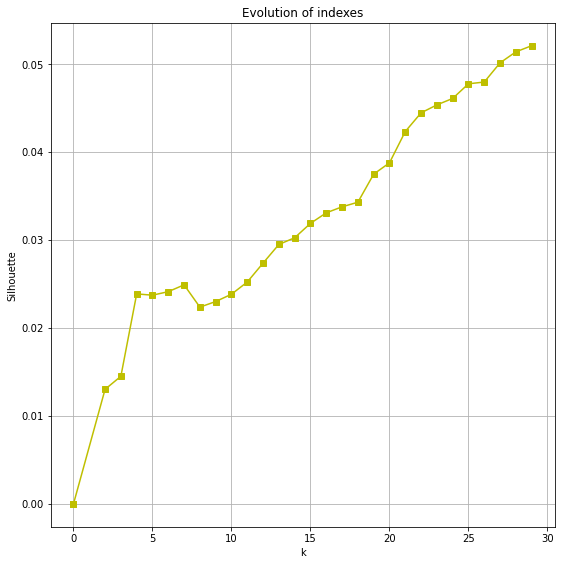

In [55]:
max=30
Sil=np.zeros(max)
x_axis=np.zeros(max)

tfidf_DTM_papers_norm = Normalizer().transform(tfidf_DTM_papers)

for m in range (2,max) :

    model = KMeans(n_clusters=m, max_iter=100, n_init=1, init="k-means++", random_state=3).fit(tfidf_DTM_papers_norm)

    # assign a cluster to each example
    labels = model.predict(tfidf_DTM_papers_norm)

    Sil[m]=silhouette_score(tfidf_DTM_papers_norm, labels, metric="cosine")
    x_axis[m]=m

fig = plt.figure(figsize=(7, 7))
a1 = fig.add_axes([0,0,1,1])
l1 = a1.plot(x_axis,Sil,'ys-') # solid line with yellow colour and square marker
a1.set_xlabel('k')
a1.set_ylabel('Silhouette')
a1.set_title('Evolution of indexes')
a1.yaxis.grid(True)
a1.xaxis.grid(True)
plt.show()

Ajouter le bon numéro de cluster à génèrer en substituant les trois points `...`

In [57]:
tfidf_DTM_papers_norm = Normalizer().transform(tfidf_DTM_papers.toarray())
model = KMeans(n_clusters = ..., max_iter=200, n_init=1, init="k-means++", random_state=1).fit(tfidf_DTM_papers_norm)
# assign a cluster to each example
labels = model.predict(tfidf_DTM_papers_norm)

print("Silhouette=", silhouette_score(tfidf_DTM_papers_norm, labels, metric="cosine"))

Silhouette= 0.008291263680550371


In [58]:
model.n_clusters

4

In [59]:
Counter(model.labels_)

Counter({0: 948, 1: 1381, 2: 535, 3: 115})

In [60]:
plot_data_by_cluster(tfidf_DTM_papers_norm, model )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2979 samples in 0.013s...
[t-SNE] Computed neighbors for 2979 samples in 1.556s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2979
[t-SNE] Computed conditional probabilities for sample 2000 / 2979
[t-SNE] Computed conditional probabilities for sample 2979 / 2979
[t-SNE] Mean sigma: 0.305359
[t-SNE] KL divergence after 50 iterations with early exaggeration: 83.299271
[t-SNE] KL divergence after 1000 iterations: 1.691399
t-SNE done! Time elapsed: 11.763361930847168 seconds


ModuleNotFoundError: No module named 'colorcet'

In [61]:
from wordcloud import WordCloud
wordcloud_par_cluster(wordcloud = WordCloud(), # WordCloud function. 
                      DTM = tfidf_DTM_papers_norm,# Document-Term Matrix 
                      cls_kmeans = model, # Insert the result of a kmeans clustering
                      vocab = vectorized.vocabulary_, # a vocabulary from scikitlearn vectorizer
                      first_n_words=10,#  It indicates how many words to print
                      figsize=(12, 10),
                      fontsize=32,
                      plot_wordcloud = False, # Switch to True if you want to plot wordclouds
                      lst_clust = [], # Insert a list of integer to get info about a selected number of cluster. It shows info of all the clustrs if empty list
                      title_in_plot = "Clust_")

ModuleNotFoundError: No module named 'wordcloud'

In [62]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
df['target_converted'] = df.target
df['target_converted'] = df.target_converted.apply(lambda x: 0 if x == 7 else x)
df['target_converted'] = df.target_converted.apply(lambda x: 1 if x == 10 else x)
df['target_converted'] = df.target_converted.apply(lambda x: 2 if x == 13 else x)
print(accuracy_score(df.target_converted, model.labels_))

0.041289023162134945


## <font color = 'E3A440'>5.3 Question méthodes supervisées </font>

Classifier les messages dans les groupes précédents

In [63]:
from sklearn.model_selection import train_test_split
tfidf_DTM_papers_norm = Normalizer().transform(tfidf_DTM_papers)
X_train, X_test, y_train, y_test = train_test_split(tfidf_DTM_papers_norm, df.target, test_size = 0.2,  random_state=1)

In [64]:
print(X_train.shape)
print(len(y_train))

(2383, 13655)
2383


In [65]:
print(X_test.shape)
print(len(y_test))

(596, 13655)
596


In [75]:
cls = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

Validation des performances d'apprentissage

In [76]:
y_valid=cls.predict(X_train)

In [80]:
cls.score(X_train, y_valid)

1.0

In [81]:
print(confusion_matrix(y_train, y_valid))

[[786   0   0]
 [  0 800   0]
 [  0   0 797]]


Validation des performances de prédictions

In [82]:
y_pred = cls.predict(X_test)

In [83]:
cls.score(X_test, y_test)

0.988255033557047

In [84]:
print(confusion_matrix(y_test, y_pred))

[[201   1   2]
 [  1 197   1]
 [  2   0 191]]


In [69]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.9882937240300865

In [70]:
print(confusion_matrix(y_test, y_pred))

[[201   1   2]
 [  1 197   1]
 [  2   0 191]]


## <font color = 'E3A440'> 2.3 NOTES PERSONNELLES: </font>

-----

-----